tensor([[-8.5550,  7.0646],
        [-6.1375, -6.5808],
        [-6.3213, -6.8041],
        [ 4.1805,  1.1233],
        [ 4.3803,  0.4700]]) tensor([3, 2, 2, 1, 1])
tensor([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3, 3, 3,
        1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 3, 3, 1, 2, 1, 3, 1, 3, 0, 1,
        3, 1, 2, 0, 1, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 1, 0, 2, 2, 1, 0, 3, 0,
        1, 2, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 1, 3, 2, 2, 0, 0, 0, 0, 1, 1, 3, 1,
        3, 0, 1, 2, 1, 3, 3, 0, 3, 1, 1, 0, 2, 0, 3, 2, 1, 1, 1, 1, 2, 3, 2, 1,
        0, 2, 3, 1, 3, 2, 1, 3, 2, 1, 0, 2, 1, 3, 1, 3, 0, 2, 1, 1, 0, 0, 3, 3,
        3, 1, 1, 0, 0, 0, 0, 3, 2, 2, 0, 1, 0, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 2,
        3, 2, 1, 0, 0, 1, 0, 3, 2, 3, 2, 3, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 1, 0,
        1, 1, 0, 3, 2, 2, 2, 3, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0,
        2, 0, 3, 1, 3, 3, 2, 0, 3, 0, 1, 2, 2, 0, 0, 2, 0, 3, 2, 2, 3, 2, 2, 1,
        2, 3, 2, 1, 3, 0, 1, 0, 1, 

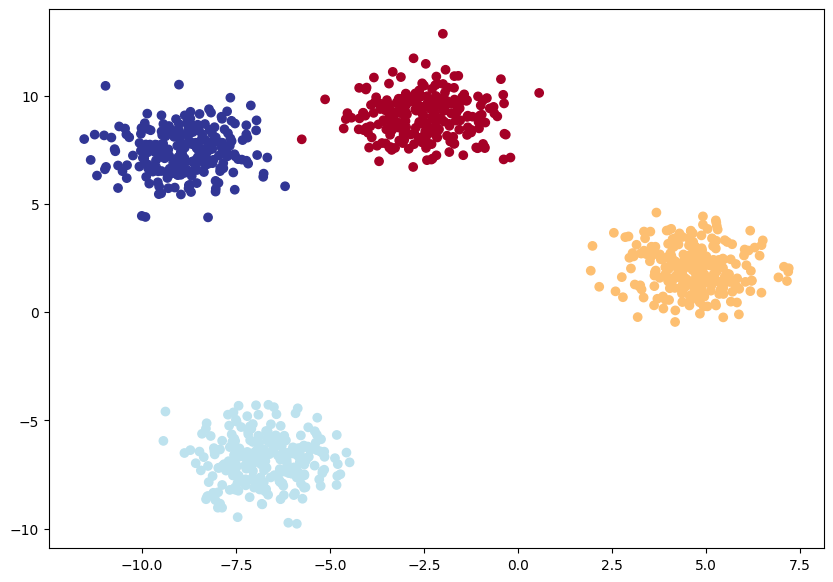

In [13]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);
print(y_blob)

In [11]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [14]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [20]:
model_4(X_blob_train.to(device))[:5]

tensor([[ 0.0811, -0.0437,  2.8915,  1.2658],
        [ 1.5112, -0.1135,  1.8232,  1.2922],
        [-0.3124,  0.9901, -5.4143, -2.0387],
        [-0.0544,  0.7727, -3.8708, -1.3683],
        [ 1.3530, -0.0171,  1.1902,  1.0013]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [22]:
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

In [34]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.2015, -0.0755,  3.0215,  1.3524],
        [ 1.6709,  0.2083, -1.0895,  0.2241],
        [-0.3318,  0.8964, -4.5974, -1.7315],
        [-0.0276,  0.0617,  2.1243,  0.9385],
        [ 1.4327, -0.1942,  2.5983,  1.5654]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.0461, 0.0349, 0.7733, 0.1457],
        [0.6535, 0.1514, 0.0413, 0.1538],
        [0.2139, 0.7304, 0.0030, 0.0528],
        [0.0751, 0.0821, 0.6456, 0.1972],
        [0.1803, 0.0354, 0.5784, 0.2059]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [35]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_pred, y_true):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [37]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 1000

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.00843, Acc: 99.88% | Test Loss: 0.00662, Test Acc: 100.00%
Epoch: 10 | Loss: 0.00773, Acc: 99.88% | Test Loss: 0.00597, Test Acc: 100.00%
Epoch: 20 | Loss: 0.00716, Acc: 99.88% | Test Loss: 0.00543, Test Acc: 100.00%
Epoch: 30 | Loss: 0.00669, Acc: 99.88% | Test Loss: 0.00499, Test Acc: 100.00%
Epoch: 40 | Loss: 0.00628, Acc: 99.88% | Test Loss: 0.00461, Test Acc: 100.00%
Epoch: 50 | Loss: 0.00594, Acc: 99.88% | Test Loss: 0.00430, Test Acc: 100.00%
Epoch: 60 | Loss: 0.00564, Acc: 99.88% | Test Loss: 0.00402, Test Acc: 100.00%
Epoch: 70 | Loss: 0.00538, Acc: 99.88% | Test Loss: 0.00378, Test Acc: 100.00%
Epoch: 80 | Loss: 0.00515, Acc: 99.88% | Test Loss: 0.00357, Test Acc: 100.00%
Epoch: 90 | Loss: 0.00494, Acc: 99.88% | Test Loss: 0.00339, Test Acc: 100.00%
Epoch: 100 | Loss: 0.00476, Acc: 99.88% | Test Loss: 0.00322, Test Acc: 100.00%
Epoch: 110 | Loss: 0.00460, Acc: 99.88% | Test Loss: 0.00307, Test Acc: 100.00%
Epoch: 120 | Loss: 0.00445, Acc: 99.88% | Test Loss

In [39]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ 14.9151,  24.2259, -14.7774,  -9.6801],
        [  2.6039, -21.1423,   0.8062,  13.8645],
        [-26.8881, -35.9114,  26.3407,  14.1687],
        [  9.0227,  18.3669,  -9.3104,  -7.8821],
        [ 19.9442,  11.6150, -17.2312,  -0.6946],
        [  2.2635, -24.7333,   1.5306,  15.9112],
        [-26.0965, -31.8428,  25.1941,  11.9669],
        [ 16.1992,   5.2041, -13.4190,   2.0533],
        [-29.3870, -43.2027,  29.2630,  17.8023],
        [ 17.3378,   7.4465, -14.6149,   1.0427]], device='cuda:0')

In [41]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 100.0%


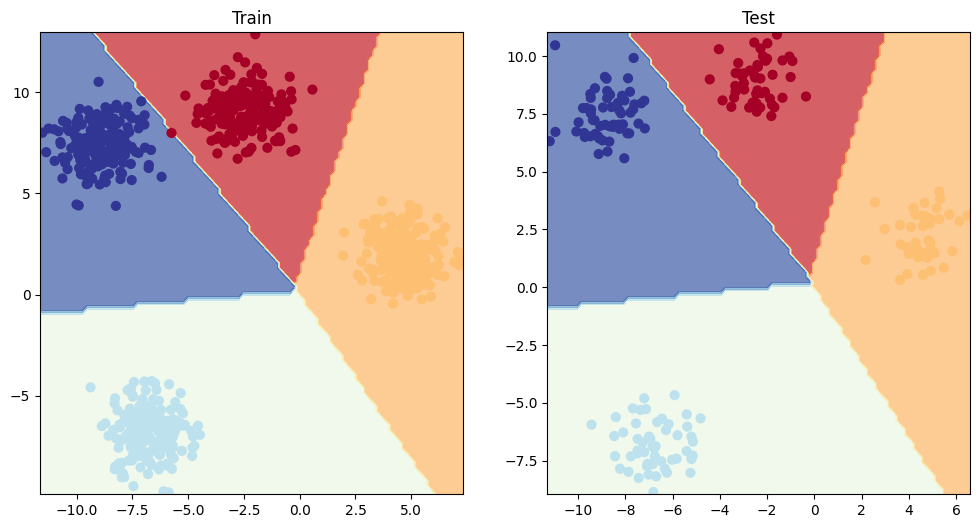

In [42]:
from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)